# Statistical Summary of Data

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit

# Loading Dataset
df = pd.read_csv("hmnist_28_28_RGB.csv")
meta_data = pd.read_csv("HAM10000_metadata.csv")
# Getting Labels
all_labels = meta_data['dx']
labels = meta_data['dx'].isin(['bcc', 'mel', 'akiec'])
image_name = meta_data['image_id']

df_without_label = df.drop(columns=['label'])
# print(f"{df_without_label=}")

pixel_columns = df_without_label.columns
# print(f"{pixel_columns=}")

cancer_count = sum(labels == True)
noncancer_count = sum(labels == False)
print("Cancer Instances:", cancer_count)
print("Non-Cancer Instances:", noncancer_count)
df


Cancer Instances: 1954
Non-Cancer Instances: 8061


,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,...,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,...,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,...,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,...,209,166,185,172,135,149,109,78,92,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10010,183,165,181,182,165,180,184,166,182,188,...,208,185,187,208,186,186,206,187,189,0
10011,2,3,1,38,33,32,121,104,103,132,...,96,79,76,24,23,21,3,4,1,0
10012,132,118,118,167,149,149,175,156,160,184,...,204,181,178,181,159,153,172,151,145,0
10013,160,124,146,164,131,152,167,127,146,169,...,185,162,167,184,157,166,185,162,172,0


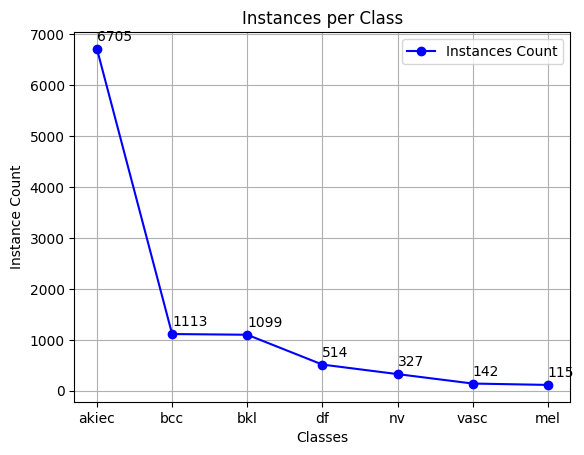

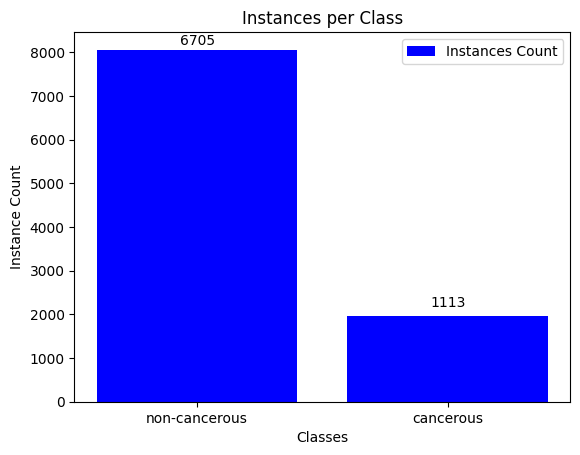

In [33]:
unique_classes_count = all_labels.value_counts()
unique_classes = ['akiec', 'bcc', 'bkl', 'df', 'nv', 'vasc', 'mel']
plt.plot(unique_classes,
         unique_classes_count, marker='o', linestyle='-', color='b', label='Instances Count')

for x_coord, y_coord in zip(unique_classes, unique_classes_count):
    plt.text(x_coord, y_coord+100, f'{y_coord}', ha='left', va='bottom')

plt.xlabel('Classes')
plt.ylabel('Instance Count')
plt.title('Instances per Class')
plt.legend()
plt.grid(True)
plt.show()

unique_classes_count = all_labels.value_counts()
unique_classes = ['non-cancerous', 'cancerous']
plt.bar(unique_classes,
         [noncancer_count, cancer_count], color='b', label='Instances Count')

for x_coord, y_coord in zip(unique_classes, unique_classes_count):
    plt.text(x_coord, y_coord+1000+(400 if x_coord=='non-cancerous' else 0), f'{y_coord}', ha='center', va='bottom')

plt.xlabel('Classes')
plt.ylabel('Instance Count')
plt.title('Instances per Class')
plt.legend()
plt.grid(False)
plt.show()


[9810 9647 9866  399 4155 2368 4887 1146 7162]
blue_values[-1]=array([170, 169, 174, 145, 172, 185, 171, 160, 173, 174, 201, 203, 189,
       194, 204, 208, 205, 202, 205, 219, 219, 216, 207, 201, 208, 189,
       145, 140], dtype=int64)
blue_values[-1]=array([159, 167, 165, 173, 177, 179, 182, 187, 184, 181, 175, 184, 188,
       186, 190, 186, 182, 180, 187, 188, 188, 180, 176, 172, 174, 170,
       161, 149], dtype=int64)
blue_values[-1]=array([119, 113, 130, 139, 138, 143, 136, 135, 139, 148, 146, 147, 146,
       149, 149, 148, 145, 141, 136, 145, 150, 152, 154, 153, 151, 147,
       145, 146], dtype=int64)
blue_values[-1]=array([191, 189, 190, 189, 186, 184, 179, 175, 185, 182, 183, 185, 184,
       196, 199, 192, 183, 183, 194, 195, 191, 190, 194, 191, 192, 188,
       188, 187], dtype=int64)
blue_values[-1]=array([168, 170, 177, 177, 176, 182, 184, 184, 186, 180, 166, 163, 177,
       179, 171, 167, 159, 152, 160, 163, 149, 155, 168, 174, 177, 179,
       178, 183], dtype=int64

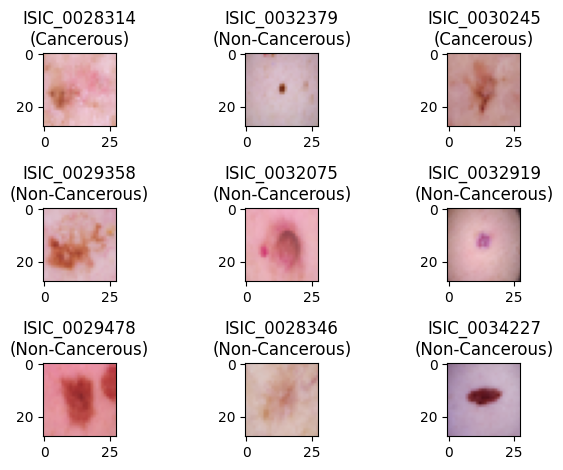

In [34]:
rows = 3
cols = 3
plotNo = 0


def plotImage(index):
    global plotNo
    plt.subplot(rows, cols, plotNo+1)
    value = df_without_label[pixel_columns][index:index+1].values[0]

    red_values = (value[0:2352:3]).reshape(28, 28)
    green_values = value[1:2352:3].reshape(28, 28)
    blue_values = value[2:2352:3].reshape(28, 28)
    print(f"{blue_values[-1]=}")

    rgb_image = np.stack([red_values, green_values, blue_values], axis=-1)

    plt.title(f"{image_name[index]}\n({'Cancerous' if labels[index] else 'Non-Cancerous'})")
    plt.imshow(rgb_image)
    plotNo += 1


stratified_splitter = StratifiedShuffleSplit(
    n_splits=1, test_size=9, random_state=56)

for train_index, test_index in stratified_splitter.split(df_without_label, labels):
    print(f"{test_index}")
    for index in test_index:
        plotImage(index)

plt.tight_layout()
plt.show()


In [5]:
from sklearn import svm
from sklearn.model_selection import train_test_split

model = svm.SVC()
for train_index, test_index in StratifiedShuffleSplit(n_splits=1,
    test_size=0.2, random_state=56).split(df_without_label, labels):
    print(f"{train_index=}")
    print(f"{test_index=}")
    X_train, X_test, y_train, y_test = df_without_label.iloc[train_index], df_without_label.iloc[test_index], labels[train_index], labels[test_index]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = sum(y_pred == y_test)/len(y_test)
    print(f"{accuracy=}")

train_index=array([2827,  203, 2613, ..., 2287, 4942, 4079], dtype=int64)
test_index=array([2376, 7742, 1896, ..., 5367, 2466, 7142], dtype=int64)
